# 🐍 Python 🎨 Style Transfer: Turn Any Image Into Van Gogh Art!

## ❓What if your photo could look like "The Starry Night"?  
Neural networks now allow us to create expressive, swirling brushstrokes — just like Van Gogh — with just a few lines of Python code.

## 👉 Solution  
We use a pre-trained model from TensorFlow Hub to apply **neural style transfer**, blending a real-world image with the aesthetic of Van Gogh.

## 🔧 How does it work?
*️⃣ The model takes two images:  
 ✦ A content image (e.g. astronaut from `skimage`)  
 ✦ A style image (fetched online: "The Starry Night")  
*️⃣ It blends structure from the content image with textures from the style image.

## 🔎 Why it matters?
This approach has real-world relevance in:  
🎬 Creative content generation  
🧠 Cognitive stimulation through visual art  
🧵 AI-driven storytelling & education

## ✨ Real-world use case:
Imagine an app that allows users to transform their profile or product images into museum-grade art. This boosts engagement and adds artistic uniqueness.

## ⚙️ Business impact:
🎨 Creative agencies can offer premium art filters  
🧩 Startups can deliver value-added AI-powered image editors  
🌍 Visual education tools for neurodivergent communities

## 📊 What the code does:
1️⃣ Loads a content image (`astronaut`)  
2️⃣ Downloads and processes “Starry Night”  
3️⃣ Uses the **arbitrary image stylization** model to mix both  
4️⃣ Displays all three images side-by-side for visual comparison

🔗[Github](https://github.com/jcombari/AI-For-Unstructured-Data/tree/main)

💭 Reflection:
How could you apply this to your project? If a picture is worth a thousand words — imagine what AI-generated art can express.

🔑 #Python #AI #DeepLearning #DataScience #ComputerVision #CreativeAI #Neurodiversity #VanGogh #StyleTransfer #TensorFlow #MLForArt


---

# 🐍 Python 🎨 Transferencia de estilo: ¡Convierte una imagen al estilo de Van Gogh!

## ❓¿Y si pudieras transformar tus fotos en arte postimpresionista?  
La Inteligencia Artificial ahora puede emular pinceladas como las de "La noche estrellada" de Van Gogh 🎨, y lo mejor: ¡con solo unas líneas de código!

## 👉 Solución  
Utilizamos un modelo preentrenado de TensorFlow Hub para aplicar **transferencia de estilo neural**, transformando una imagen real en una obra al estilo Van Gogh.

## 🔧 ¿Cómo funciona?
*️⃣ El modelo toma dos imágenes:  
 ✦ Una imagen de contenido (por ejemplo, un astronauta de `skimage`)  
 ✦ Una imagen de estilo (cargada directamente desde internet: "La noche estrellada")  
*️⃣ La red combina ambas para generar una nueva imagen con la estructura del contenido y las texturas del estilo.

## 🔎 ¿Por qué importa?
Esta técnica es fundamental en campos como:  
🎬 Generación de contenido visual  
🧠 Estímulo cognitivo a través de arte personalizado  
🧵 Proyectos creativos de IA para educación y storytelling visual

## ✨ Ejemplo real o caso práctico:
Imagina una app que permite a los usuarios transformar sus fotos de perfil o productos en arte de museo. Esto puede aumentar el engagement o diferenciar una marca visualmente.

## ⚙️ Impacto en el negocio:
🎨 Agencias creativas pueden ofrecer filtros artísticos premium  
🧩 Startups pueden lanzar editores de imagen con valor agregado  
🌍 Educación visual con IA para comunidades neurodivergentes

## 📊 ¿Qué hace el código?
1️⃣ Carga una imagen base (`astronauta`)  
2️⃣ Descarga y ajusta la imagen "La noche estrellada"  
3️⃣ Procesa ambas imágenes y aplica el modelo de **estilización arbitraria**  
4️⃣ Muestra las tres imágenes en paralelo para visualización inmediata

🔗[Github](https://github.com/jcombari/AI-For-Unstructured-Data/tree/main)

💭 Reflexión:
¿Te imaginas cómo podrías aplicar esto en un proyecto real? Si una imagen vale más que mil palabras, ¡imagina una obra de arte generada por IA!

🔑 #Python #DataScience #AI #DeepLearning #ComputerVision #Neurodiversidad #TensorFlow #VanGogh #Estilo #IAcreativa #TransformaConCiencia

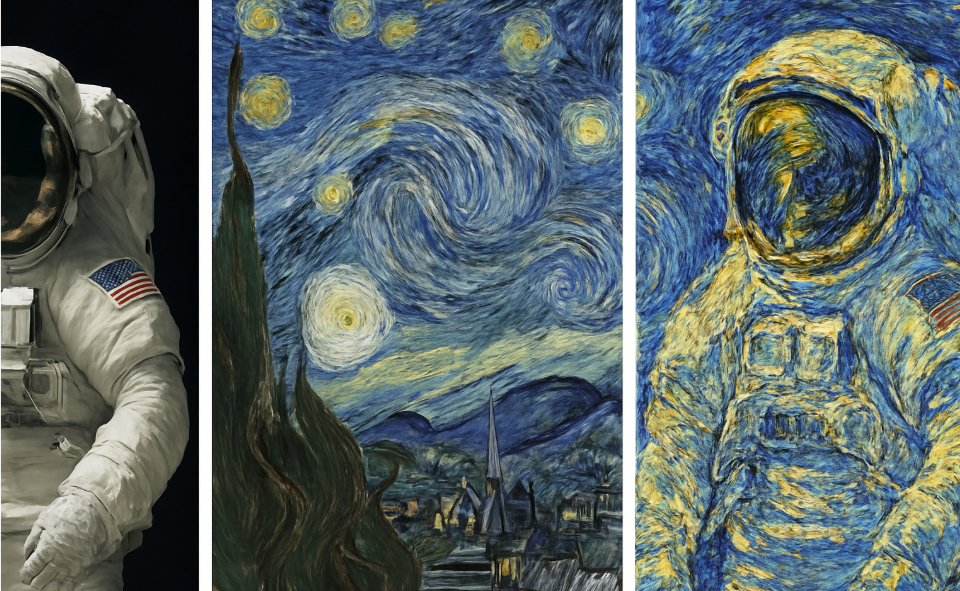


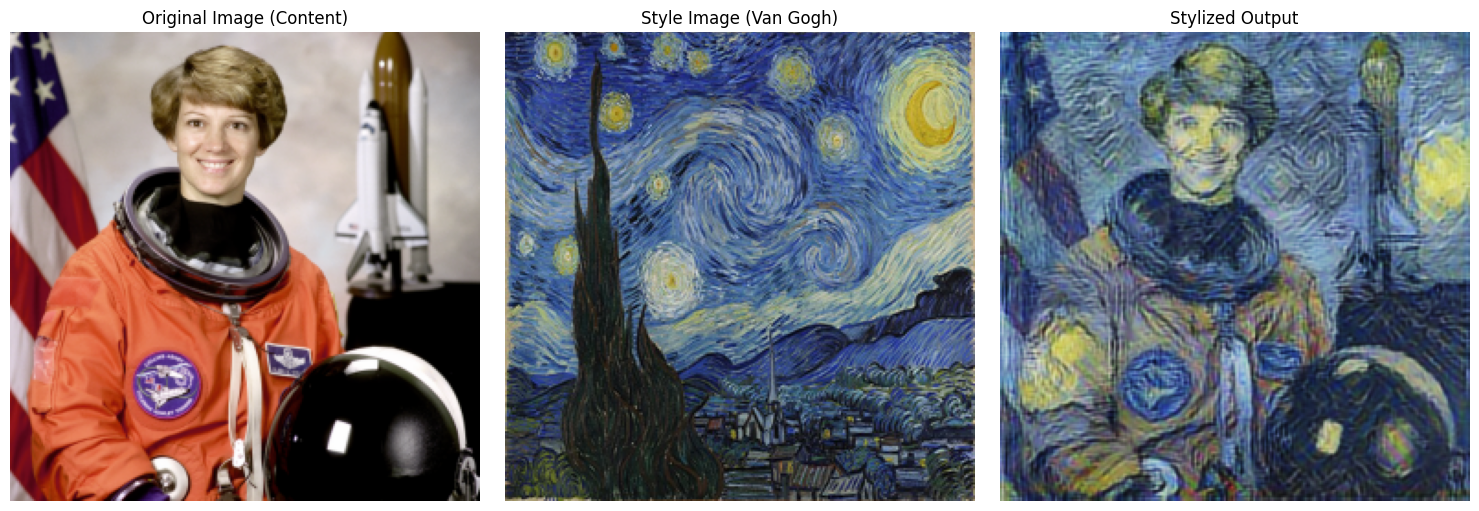

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from skimage import data
from skimage.transform import resize
import requests
from PIL import Image
from io import BytesIO

# Load a sample content image (astronaut) and resize
content_image = data.astronaut()
content_image = resize(content_image, (256, 256), anti_aliasing=True)
content_image = (content_image * 255).astype(np.uint8)

# Load Van Gogh's Starry Night from a URL
style_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/640px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg'
response = requests.get(style_url)
style_image = Image.open(BytesIO(response.content)).convert('RGB')
style_image = style_image.resize((256, 256))
style_image = np.array(style_image)

# Convert images to tensors and preprocess
def preprocess(image):
    image = tf.convert_to_tensor(image)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = image[tf.newaxis, ...]
    return image

content_tensor = preprocess(content_image)
style_tensor = preprocess(style_image)

# Load style transfer model from TensorFlow Hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Generate stylized image
stylized_image = hub_model(tf.constant(content_tensor), tf.constant(style_tensor))[0]

# Plot all three images side by side
def show_side_by_side(content, style, stylized):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    images = [content, style, stylized]
    titles = ["Original Image (Content)", "Style Image (Van Gogh)", "Stylized Output"]

    for ax, img, title in zip(axes, images, titles):
        img = img[0].numpy()
        img = np.clip(img, 0, 1)
        ax.imshow(img)
        ax.set_title(title)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Call function to display the results
show_side_by_side(content_tensor, style_tensor, stylized_image)
